# chainslanggraph

In [84]:
from dotenv import load_dotenv
load_dotenv()
import os 
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [85]:
from langchain_core.messages import AIMessage,HumanMessage
from pprint import pprint

messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))
messages.append(AIMessage(content=f"Which programming language you want to learn",name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn python programming language",name="Krish"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell me how can I help
================================ Human Message =================================
Name: Krish

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Which programming language you want to learn
================================ Human Message =================================
Name: Krish

I want to learn python programming language


In [86]:
from langchain_groq import ChatGroq
groq_api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(model="openai/gpt-oss-120b", api_key=groq_api_key)
result = llm.invoke(messages)

In [87]:
result.response_metadata

{'token_usage': {'completion_tokens': 2219,
  'prompt_tokens': 113,
  'total_tokens': 2332,
  'completion_time': 4.172255636,
  'prompt_time': 0.006118362,
  'queue_time': 0.06908161,
  'total_time': 4.178373998},
 'model_name': 'openai/gpt-oss-120b',
 'system_fingerprint': 'fp_e10890e4b9',
 'service_tier': 'on_demand',
 'finish_reason': 'stop',
 'logprobs': None}

In [88]:
def add(a:int, b:int)->int:
    """ Add a and b
    Args:
        a(int) : first int
        b(int) : second int

    Return:
        int
    """
    return a + b

In [89]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x11fcabe00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x11fe904d0>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [90]:
### Binding tool with llm

llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name="Krish")])

In [91]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message: list[AnyMessage]

In [92]:
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [93]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Krish')]

In [ ]:
ai_message=AIMessage(content=f"Which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [ ]:
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='f3ba87c4-1e1a-4b74-82c1-33d7a681253a'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Krish', id='c8d532d9-a75f-4687-8409-032e6bcd929e'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='3d122043-bfd0-465e-8db3-3683448c39bc')]

In [ ]:
## chatbot node functionality
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

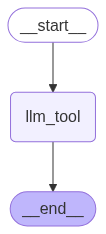

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder = StateGraph(State)

builder.add_node('llm_tool',llm_tool)

builder.add_edge(START, "llm_tool")
builder.add_edge("llm_tool", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:

messages=graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================

2 + 2 = 4.


In [ ]:
tools = [add]

In [98]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)


graph_builder = builder.compile()

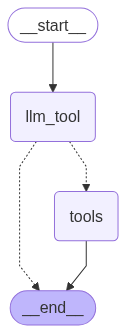

In [99]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [100]:
## invocation

messages=graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================

2 + 2 = 4.


In [102]:
messages = graph.invoke({"messages": "What Machine Learning"})
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What Machine Learning
================================== Ai Message ==================================

**Machine Learning (ML)** is a branch of artificial intelligence (AI) that focuses on building systems that can learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for each specific task. Below is a concise overview covering the core concepts, types, workflow, and common applications.

---

## 1. Core Idea
- **Learning from data:** Instead of writing explicit rules, you provide a model with examples (data) and let it discover the underlying relationships.
- **Generalization:** The goal is for the model to perform well on *new* (unseen) data, not just the data it was trained on.

---

## 2. Main Types of Machine Learning

| Category | How it learns | Typical algorithms | Typical tasks |
|--------|--------------|-------------------|------------|
| **Su